<a href="https://colab.research.google.com/github/Orikson/MAT-421/blob/main/MAT421_Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Often times, in numerical simulations, it is difficult to compute on continuous functions, when we don't know specifically what defines that function (or its derivative may not be analytically known). The best approximation of the derivative is still useful even in these cases. Even though a function might be continuous, can we approximate its derivative using a discrete subsampling of the function?

For this module, we look at this numerical differentiation on regular grids, which have consistent and linear spacing, defined by a step size $h$.

## Particular Problems

In particular, we focus on derivatives for the following two functions
1. $y(x) = x^2 + 10 \sin(x)$
2. $z(x,y) = x^2 + y \cos(x) + y^2$

Analytical first derivative of function 1:


2⋅x + 10⋅cos(x)


Analytical partial derivative w.r.t. x of function 2:


2⋅x - y⋅sin(x)


Analytical partial derivative w.r.t. y of function 2:


2⋅y + cos(x)

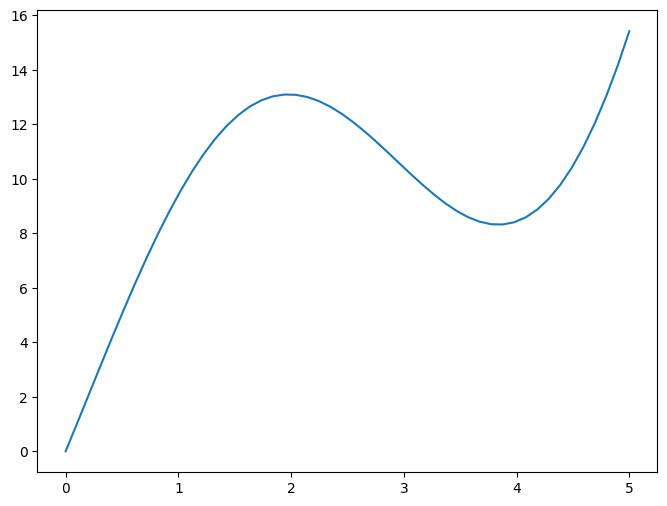

In [30]:
import sympy
sympy.init_printing()

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly

# Analytical results using sympy
x = sympy.Symbol('x')
y = sympy.Symbol('y')

print('Analytical first derivative of function 1:')
display(sympy.diff(x**2 + 10*sympy.sin(x), x))

print('\nAnalytical partial derivative w.r.t. x of function 2:')
display(sympy.diff(x**2 + y*sympy.cos(x) + y**2, x))

print('\nAnalytical partial derivative w.r.t. y of function 2:')
display(sympy.diff(x**2 + y*sympy.cos(x) + y**2, y))

# Plot functions
def f1(x):
  ''' x has shape (n) '''
  return x**2 + 10*np.sin(x)

def f1_1(x):
  return 2*x + 10*np.cos(x)

def f2(x):
  ''' x has shape (2,n) '''
  x, y = x
  return x**2 + y * np.cos(x) + y**2

def f2_x(x):
  x, y = x
  return 2*x - y * np.sin(x)

def f2_y(x):
  x, y = x
  return 2*y + np.cos(x)

x = np.linspace(0, 5, 50)
plt.figure(figsize=(8,6))
plt.plot(x, f1(x))
plt.show()

x, y = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
z = f2((x,y))
trace = go.Surface(x=x, y=y, z=z)

fig = go.Figure(data=[trace])
fig.update_layout(autosize=False, width=1000, height=800)
fig.show()

# Finite Difference Approximating Derivatives

Finite difference methods can be generated using a Taylor series expansion. Consider the Taylor series of a function around a point $a$.

$$
f(x) = \frac{f(a)(x-a)^0}{0!} + \frac{f^\prime(a)(x-a)^1}{1!} + \frac{f^{\prime\prime}(a)(x-a)^2}{2!} + \ldots
$$

We can derive many kinds of differences from here, but the main ones we will focus on are the forward difference, the backwards difference, and the central difference.

Consider evaluation of this Taylor series at $x_{i-1}, x_{i}$, and $x_{i+1}$, where each $x_i$ is on a regular grid (i.e. has a uniform spacing $h$). If we let $x_{i} = a$ then $x_{i-1} = a - h$ and $x_{i+1} = a + h$.

$$
\begin{align}
f(a-h) &= \frac{f(a)(-h)^0}{0!} + \frac{f^\prime(a)(-h)^1}{1!} + \frac{f^{\prime\prime}(a)(-h)^2}{2!} + \ldots \\
f(a) &= f(a) \\
f(a+h) &= \frac{f(a)(h)^0}{0!} + \frac{f^\prime(a)(h)^1}{1!} + \frac{f^{\prime\prime}(a)(h)^2}{2!} + \ldots
\end{align}
$$

If we take various differences we obtain different finite differencing methods.

**Backward Difference**
$$f(a) - f(a-h) = h f^\prime(a) - \sum_{i=2}^\infty \frac{f^{(i)}(a)(-h)^i}{i!}$$
yields
$$f^\prime(a) = \frac{f(a) - f(a-h)}{h} + \frac{1}{h} \sum_{i=2}^\infty \frac{f^{(i)}(a)(-h)^i}{i!} = \frac{f(a) - f(a-h)}{h} + O(h)$$

**Forward Difference**
$$f(a+h) - f(a) = h f^\prime(a) + \sum_{i=2}^\infty \frac{f^{(i)}(a)(h)^i}{i!}$$
yields
$$f^\prime(a) = \frac{f(a+h) - f(a)}{h} - \frac{1}{h}\sum_{i=2}^\infty \frac{f^{(i)}(a)(h)^i}{i!} = \frac{f(a+h) - f(a)}{h} + O(h)$$

**Central Difference**
$$f(a+h) - f(a-h) = 2h f^\prime(a) + \sum_{i=2}^\infty \frac{f^{(i)}(a)(h^i - (-h)^i)}{i!}$$
yields
$$f^\prime(a) = \frac{f(a+h) - f(a-h)}{2h} - \sum_{i=2}^\infty \frac{f^{(i)}(a)(h^i - (-h)^i)}{i!} = \frac{f(a+h) - f(a-h)}{2h} + O(h^2)$$

As such, backward and forward finite difference is $O(h)$ and central difference is $O(h^2)$. This principle applies to partial derivatives as well, using the generalized form of Taylor series.

From the results below, we test the central difference method, and we can see that as step size decreases, accuracy improves.



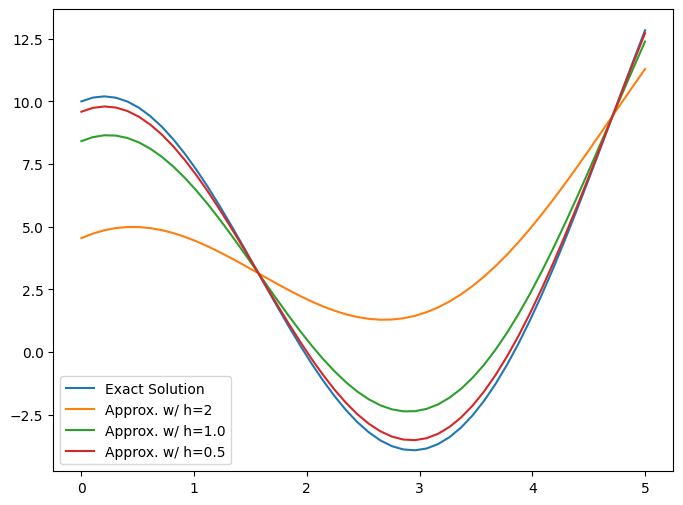

-------------------------------------------------------
In the below plot:
	Red is Exact Partial w.r.t. x
	Green is Approx Partial w.r.t. x with h=1


In [61]:
def forward_difference(f, x, h, i=None):
  if i is None:
    return (f(x + h) - f(x)) / h
  return (f(x + h) - f(x)) / h[i]

def backward_difference(f, x, h, i=None):
  if i is None:
    return (f(x) - f(x - h)) / h
  return (f(x) - f(x - h)) / h[i]

def central_difference(f, x, h, i=None):
  if i is None:
    return (f(x + h) - f(x - h)) / (2*h)
  return (f(x + h) - f(x - h)) / (2*h[i])

x1 = np.linspace(0, 5, 50)
plt.figure(figsize=(8,6))
plt.plot(x1, f1_1(x1), label='Exact Solution')
h = 2
for i in range(3):
  plt.plot(x1, central_difference(f1, x1, h), label=f'Approx. w/ h={h}')
  h /= 2
plt.legend()
plt.show()

c0 = np.zeros(shape=(50, 50))
c1 = np.ones(shape=(50, 50))
colorscale = [[0, 'rgb(150, 20, 0)'],
              [1, 'rgb(0, 150, 20)']]

x, y = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
z = f2_x(np.array([x,y]))
trace1 = go.Surface(x=x, y=y, z=z, surfacecolor=c0, colorscale=colorscale, cmin=0, cmax=1, name='Exact Partial w.r.t. x')
z = np.reshape(central_difference(f2, np.array([x.flatten(),y.flatten()]), np.array([np.ones(50*50), np.zeros(50*50)]), 0), (50, 50))
trace2 = go.Surface(x=x, y=y, z=z, surfacecolor=c1, colorscale=colorscale, cmin=0, cmax=1, name=f'Approx Partial w.r.t. x w/ h={1}')

print('-------------------------------------------------------')
print('In the below plot:')
print('\tRed is Exact Partial w.r.t. x')
print('\tGreen is Approx Partial w.r.t. x with h=1')

fig = go.Figure(data=[trace1, trace2])
fig.update_layout( width=1000, height=800, legend=dict(visible=True))
fig.show()

# Approximating of Higher Order Derivatives

If we manipulate the Taylor series again, we can derive expressions for higher order derivatives. Consider, for example, the following, again considering the Taylor series expansion about $a$

$$
\begin{align}
f(a-h) &= \frac{f(a)(-h)^0}{0!} + \frac{f^\prime(a)(-h)^1}{1!} + \frac{f^{\prime\prime}(a)(-h)^2}{2!} + \ldots \\
f(a) &= f(a) \\
f(a+h) &= \frac{f(a)(h)^0}{0!} + \frac{f^\prime(a)(h)^1}{1!} + \frac{f^{\prime\prime}(a)(h)^2}{2!} + \ldots
\end{align}
$$

If we add these expressions we find
$$
f(a-h) + f(a+h) = 2 f(a) + h^2 f^{\prime\prime}(a) + O(h^4)
$$
and can then derive
$$f^{\prime\prime}(a) = \frac{f(a-h) - 2 f(a) + f(a+h)}{h^2} + O(h^2)$$
which is an $O(h^2)$ finite difference method for the second derivative.

From the results below, we test this second derivative method, and we can see that as step size decreases, accuracy improves.

Analytical second derivative of function 1:


2 - 10⋅sin(x)


Analytical 2nd partial derivative w.r.t. xx of function 2:


-y⋅cos(x) + 2

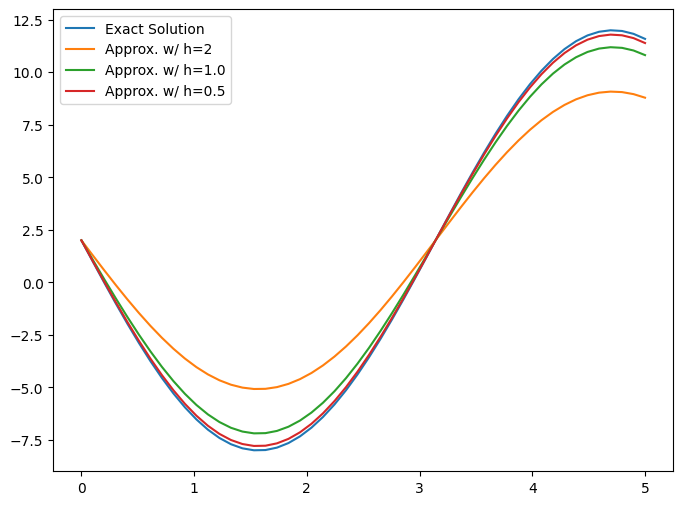

-------------------------------------------------------
In the below plot:
	Red is Exact Partial w.r.t. xx
	Green is Approx Partial w.r.t. xx with h=1


In [70]:
# Analytical results using sympy
x = sympy.Symbol('x')
y = sympy.Symbol('y')

print('Analytical second derivative of function 1:')
display(sympy.diff(sympy.diff(x**2 + 10*sympy.sin(x), x), x))

print('\nAnalytical 2nd partial derivative w.r.t. xx of function 2:')
display(sympy.diff(sympy.diff(x**2 + y*sympy.cos(x) + y**2, x), x))

def f1_2(x):
  return 2 - 10*np.sin(x)

def f2_xx(x):
  x, y = x
  return -y * np.cos(x) + 2

# Numerical results
def second_difference(f, x, h, i=None):
  if i is None:
    return (f(x + h) - 2*f(x) + f(x - h)) / (h**2)
  return (f(x + h) - 2*f(x) + f(x - h)) / (h[i]**2)

x1 = np.linspace(0, 5, 50)
plt.figure(figsize=(8,6))
plt.plot(x1, f1_2(x1), label='Exact Solution')
h = 2
for i in range(3):
  plt.plot(x1, second_difference(f1, x1, h), label=f'Approx. w/ h={h}')
  h /= 2
plt.legend()
plt.show()

c0 = np.zeros(shape=(50, 50))
c1 = np.ones(shape=(50, 50))
colorscale = [[0, 'rgb(150, 20, 0)'],
              [1, 'rgb(0, 150, 20)']]

x, y = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
z = f2_xx(np.array([x,y]))
trace1 = go.Surface(x=x, y=y, z=z, surfacecolor=c0, colorscale=colorscale, cmin=0, cmax=1, name='Exact Partial w.r.t. xx')
z = np.reshape(second_difference(f2, np.array([x.flatten(),y.flatten()]), np.array([np.ones(50*50), np.zeros(50*50)]), 0), (50, 50))
trace2 = go.Surface(x=x, y=y, z=z, surfacecolor=c1, colorscale=colorscale, cmin=0, cmax=1, name=f'Approx Partial w.r.t. xx w/ h={1}')

print('-------------------------------------------------------')
print('In the below plot:')
print('\tRed is Exact Partial w.r.t. xx')
print('\tGreen is Approx Partial w.r.t. xx with h=1')

fig = go.Figure(data=[trace1, trace2])
fig.update_layout( width=1000, height=800, legend=dict(visible=True))
fig.show()